In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer,KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\wine-clustering.csv")

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

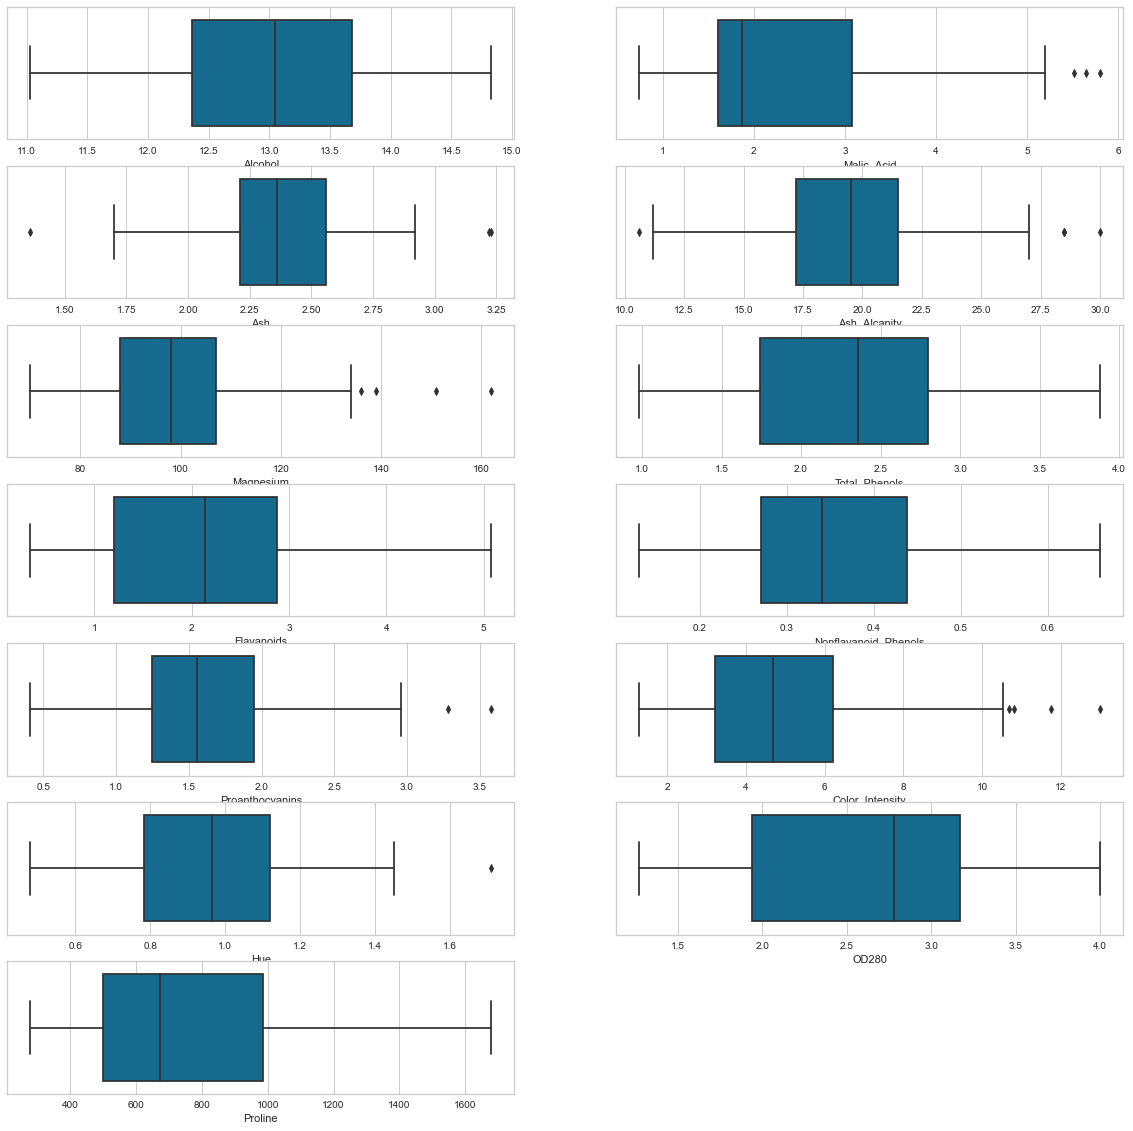

In [7]:
# outliers
j=1
plt.figure(figsize=(20,20))
for i in df.columns:
    plt.subplot(7,2,j)
    sns.boxplot(df[i])
    j+=1
    

In [8]:
#outliers
for i in df.columns:
    Q3=np.quantile(df[i],0.75)
    Q1=np.quantile(df[i],0.25)
    
    IQR=Q3-Q1
    
    UL=Q3+(1.5*IQR)
    LL=Q1-(1.5*IQR)
    df.loc[df[i]>UL,i]=UL
    df.loc[df[i]<LL,i]=LL

In [9]:
df.shape

(178, 13)

In [10]:
#lets use robust scaling as it will treat our outliers also
from sklearn.preprocessing import StandardScaler

In [11]:
sc=StandardScaler()

In [12]:
df_s=pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [14]:
df_s.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,1.883637e-16,-4.465841e-16,-2.681999e-16,-1.702758e-16,-2.972030e-16,-4.016762e-16,4.079134e-16,1.503167e-16,-1.197544e-16,7.484650e-18,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.449701e+00,-2.578195e+00,-2.662213e+00,-2.204108e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.113014e+00,-1.666938e+00,-2.106273e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.635217e-01,-5.959788e-01,-6.948555e-01,-8.584597e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-6.038048e-01,-8.064445e-01,-7.704749e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.242499e-01,-2.555683e-02,6.682950e-03,-1.108774e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-5.581813e-02,-1.544213e-01,3.541993e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.855158e-01,7.254987e-01,6.167164e-01,5.619467e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.538695e-01,5.153441e-01,7.198786e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,2.709072e+00,2.707715e+00,2.584074e+00,2.692556e+00,2.539515e+00,3.062832e+00,2.402403e+00,2.540381e+00,2.498027e+00,2.955409e+00,1.960915e+00,2.971473e+00


In [15]:
#clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [17]:
n_clus=[2,3,4,5,6,7,8,9,10]
wcss=[]
sil_scr=[]
for i in n_clus:
    model=KMeans(n_clusters=i)
    pred=model.fit_predict(df_s)
    sil_scr.append(silhouette_score(df_s,pred))
    wcss.append(model.inertia_)

In [21]:
data=pd.DataFrame({'WCSS':wcss,'Silhoute Score':sil_scr},index=n_clus)

In [22]:
data

,WCSS,Silhoute Score
2,1654.906081,0.268303
3,1266.070346,0.285463
4,1166.202736,0.241481
5,1103.375999,0.179730
6,1039.437037,0.190771
7,997.371956,0.134712
8,930.140955,0.159574
9,896.389392,0.151880
10,862.118595,0.134315


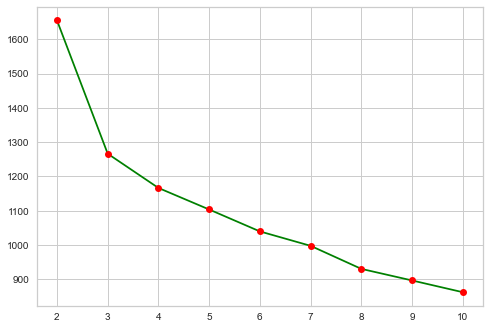

In [27]:
plt.plot(data.index,wcss,marker='o',color='green',markerfacecolor='red')

In [41]:
model=KMeans()
kelbow_viz=KElbowVisualizer(model,k=10)

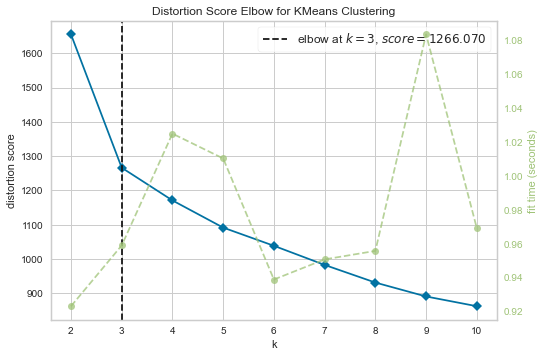

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
kelbow_viz.fit(df_s)
kelbow_viz.show()

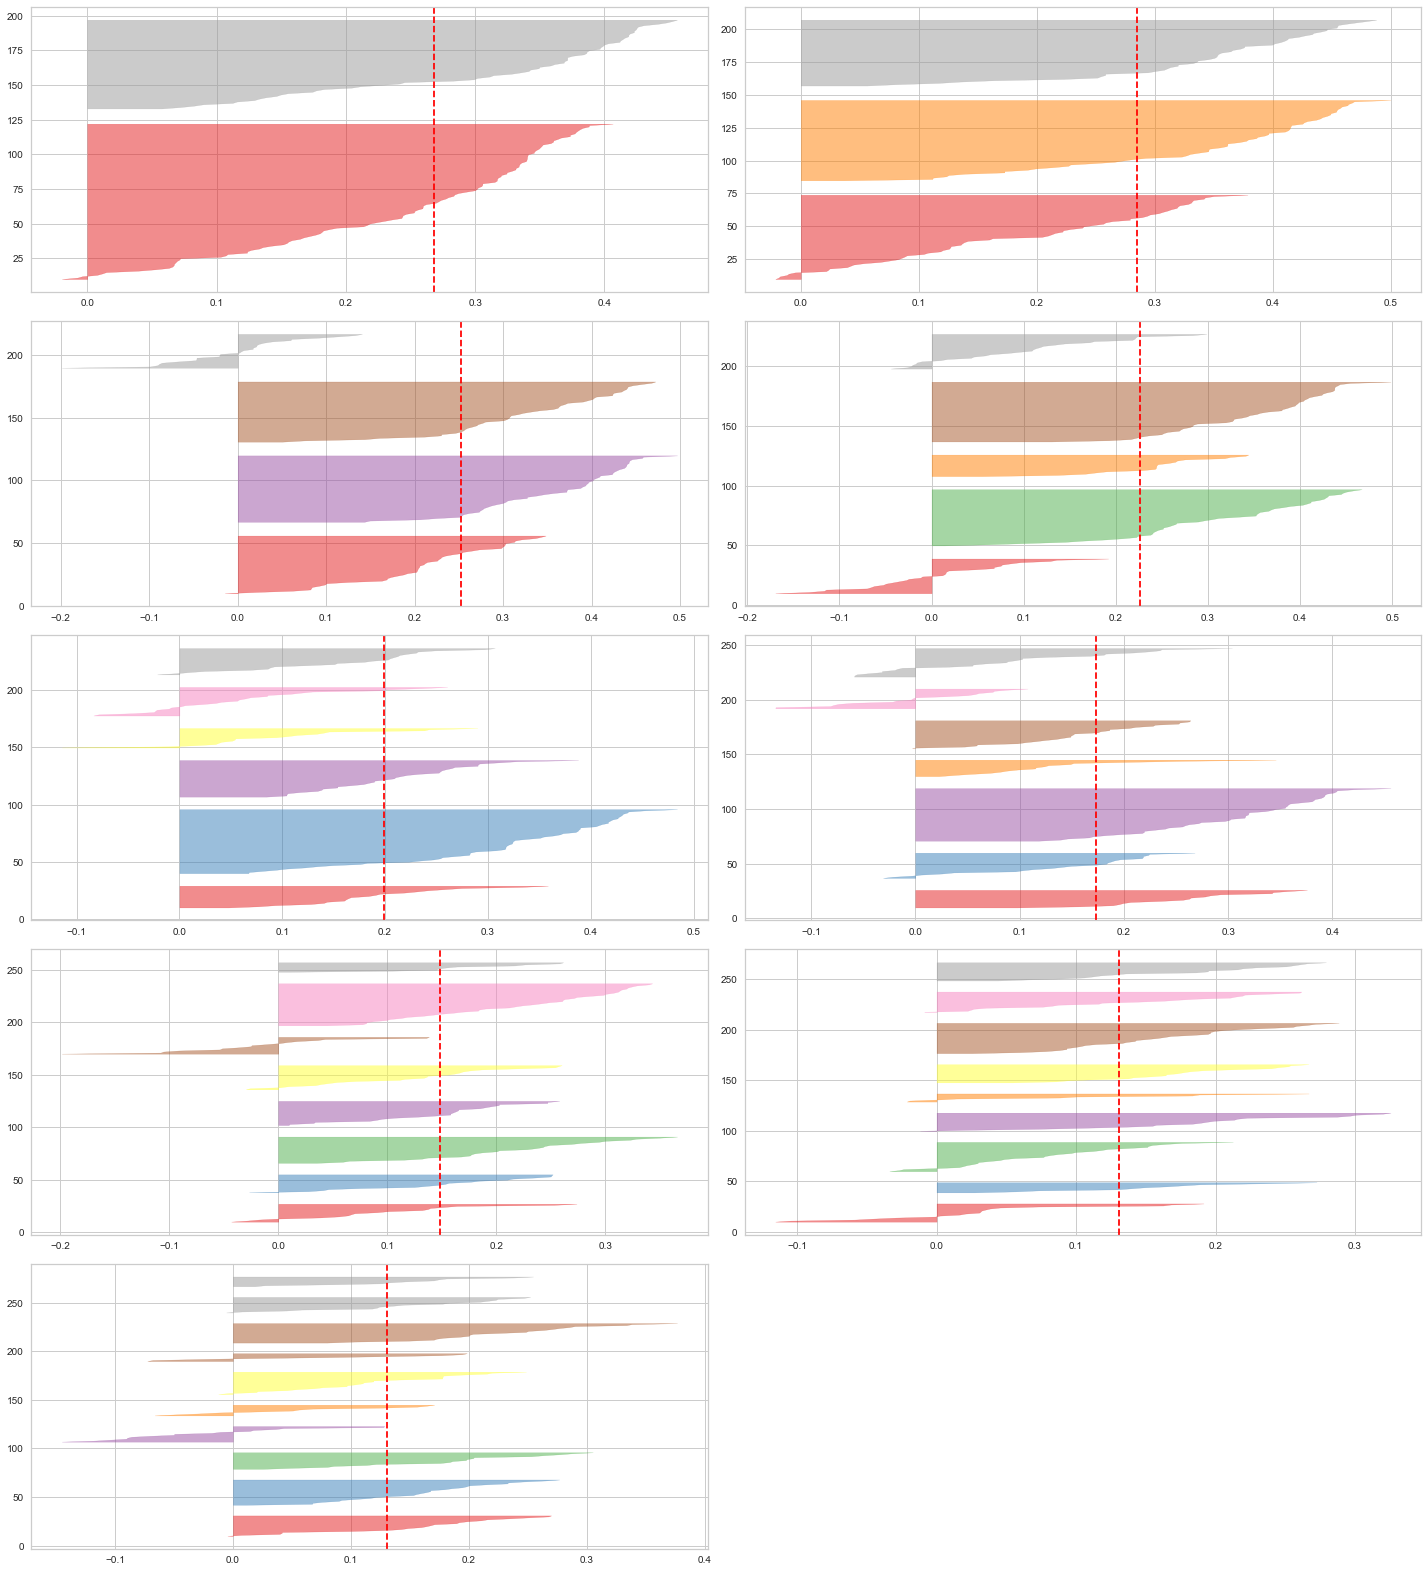

In [44]:
#Silhoutte visualizer
plt.figure(figsize=(20,22))
p=1
for i in n_clus:
    plt.subplot(5,2,p)
    model=KMeans(n_clusters=i,random_state=3)
    
    sil_viz=SilhouetteVisualizer(estimator=model)
    
    sil_viz.fit(df_s)
    p+=1
    
plt.tight_layout()
plt.show()

In [45]:
model_f=KMeans(n_clusters=3,random_state=3)

In [46]:
df['Pred_KM']=model_f.fit_predict(df_s)

In [47]:
df['Pred_KM'].value_counts()

0    65
1    62
2    51
Name: Pred_KM, dtype: int64

In [48]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Pred_KM
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


In [55]:
clust=model_f.cluster_centers_

In [59]:
clust

array([[-0.92607185, -0.40170749, -0.49600866,  0.17655379, -0.52262273,
        -0.07598265,  0.02081257, -0.03353357,  0.05239714, -0.91596806,
         0.46119397,  0.27076419, -0.75384618],
       [ 0.83523208, -0.30310701,  0.3607047 , -0.62745662,  0.59812007,
         0.88523736,  0.97781956, -0.56208965,  0.59562237,  0.18425304,
         0.47914286,  0.77924711,  1.12518529],
       [ 0.16490746,  0.88046317,  0.19366415,  0.53777086, -0.06103856,
        -0.97933029, -1.21524764,  0.72606354, -0.79087061,  0.94341639,
        -1.17028362, -1.29241163, -0.40708796]])

In [58]:
df_s.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

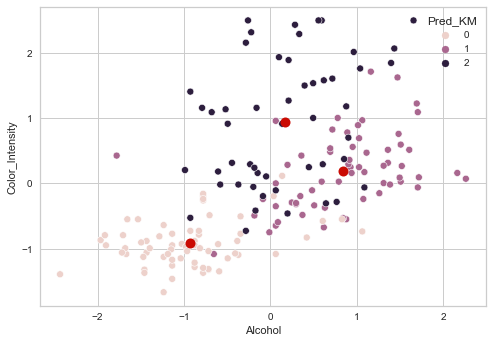

In [57]:
#alcohol and color intensity
sns.scatterplot(x='Alcohol',y='Color_Intensity',data=df_s,hue=df['Pred_KM'])
# centroid
plt.plot(clust[0][0],clust[0][9],marker='o',color='r',ms=10)
plt.plot(clust[1][0],clust[1][9],marker='o',color='r',ms=10)
plt.plot(clust[2][0],clust[2][9],marker='o',color='r',ms=10)

In [60]:
# if we want to print each cluster individually
df_s['Pred_KM']=model_f.fit_predict(df_s)

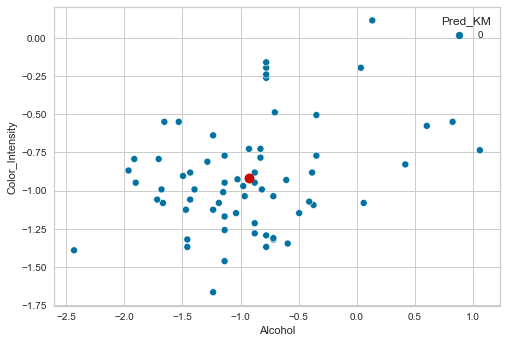

In [61]:
sns.scatterplot(x='Alcohol',y='Color_Intensity',data=df_s[df_s['Pred_KM']==0],hue='Pred_KM')

plt.plot(clust[0][0],clust[0][9],marker='o',color='r',ms=10)

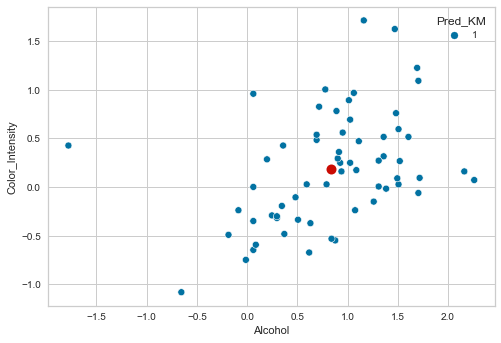

In [62]:
sns.scatterplot(x='Alcohol',y='Color_Intensity',data=df_s[df_s['Pred_KM']==1],hue='Pred_KM')

plt.plot(clust[1][0],clust[1][9],marker='o',color='r',ms=10)

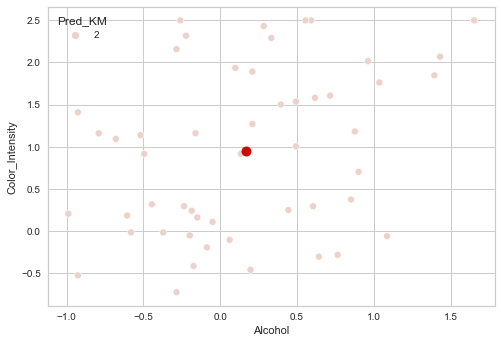

In [63]:
sns.scatterplot(x='Alcohol',y='Color_Intensity',data=df_s[df_s['Pred_KM']==2],hue='Pred_KM')

plt.plot(clust[2][0],clust[2][9],marker='o',color='r',ms=10)

In [64]:
# hierarchy clustering
#aggloromative clustering
from sklearn.cluster import AgglomerativeClustering

In [65]:
#remove target variable
del df_s['Pred_KM']

In [66]:
from scipy.cluster.hierarchy import dendrogram,linkage

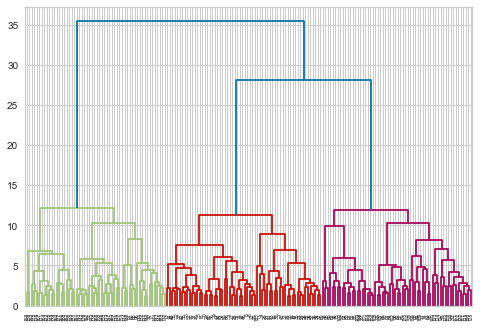

In [68]:
dist_points=linkage(df_s,method='ward')

dend=dendrogram(dist_points)
plt.show()

In [69]:
#silhoute score
n_clus

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [70]:
sil_sc=[]
for i in n_clus:
    model=AgglomerativeClustering(n_clusters=i)
    pred=model.fit_predict(df_s)
    sil_sc.append(silhouette_score(df_s,pred))

In [71]:
pd.DataFrame({'silhoute score':sil_sc})

,silhoute score
0,0.267601
1,0.278700
2,0.217224
3,0.185433
4,0.123895
5,0.125373
6,0.127837
7,0.136580
8,0.130254


In [73]:
#clustering
model_ag=AgglomerativeClustering(n_clusters=3)
df['Pred_Agglo']=model_ag.fit_predict(df_s)

In [74]:
df['Pred_Agglo'].value_counts()

2    62
1    60
0    56
Name: Pred_Agglo, dtype: int64

<AxesSubplot:xlabel='Alcohol', ylabel='Color_Intensity'>

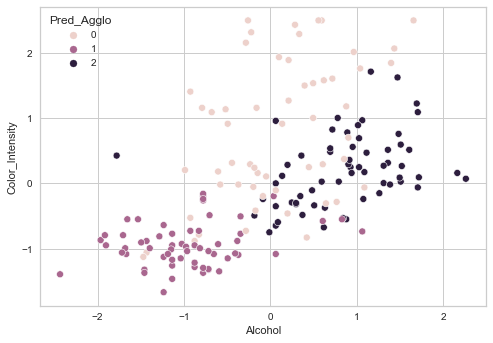

In [76]:
#alcohol and color intensity
sns.scatterplot(x='Alcohol',y='Color_Intensity',data=df_s,hue=df['Pred_Agglo'])


In [78]:
#DBSCAN
from sklearn.cluster import DBSCAN

In [ ]:
# k dist plot used to calculate epsilon value i.e. radius of cluster



In [79]:
from sklearn.neighbors import NearestNeighbors

nn=NearestNeighbors(n_neighbors=2)

nn_model=nn.fit(df_s)

In [82]:
distance,index=nn_model.kneighbors(df_s)

In [84]:
#sorting distance
distance=np.sort(distance,axis=0)

In [85]:
distance

array([[0.        , 1.19014985],
       [0.        , 1.19014985],
       [0.        , 1.20023755],
       [0.        , 1.20023755],
       [0.        , 1.22932855],
       [0.        , 1.22932855],
       [0.        , 1.23750114],
       [0.        , 1.23750114],
       [0.        , 1.25486649],
       [0.        , 1.25486649],
       [0.        , 1.30039799],
       [0.        , 1.30039799],
       [0.        , 1.30828329],
       [0.        , 1.30828329],
       [0.        , 1.31144863],
       [0.        , 1.31144863],
       [0.        , 1.32261089],
       [0.        , 1.32261089],
       [0.        , 1.34813554],
       [0.        , 1.35064978],
       [0.        , 1.35755589],
       [0.        , 1.35755589],
       [0.        , 1.35992705],
       [0.        , 1.35992705],
       [0.        , 1.37463701],
       [0.        , 1.37463701],
       [0.        , 1.37518217],
       [0.        , 1.37518217],
       [0.        , 1.37934094],
       [0.        , 1.37934094],
       [0.

Text(0.5, 0, 'Sorted Distance')

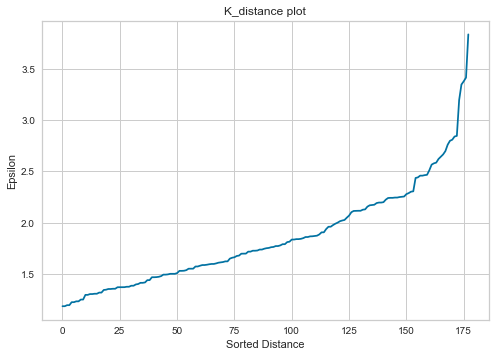

In [87]:
plt.plot(distance[:,1])
plt.title('K_distance plot')
plt.ylabel('Epsilon')
plt.xlabel('Sorted Distance')

In [95]:
#epsilon=3.1 ,min_samplles=14 to 26

# we can take min samples as n+1 to 2n 

sil_score=[]
for i in range(14,27):
    model=DBSCAN(eps=3.1,min_samples=i)
    pred_db=model.fit_predict(df_s)
    sil_score.append(silhouette_score(df_s,pred_db))

pd.DataFrame({"Silhoutte Score":sil_score},index=range(14,27))    

,Silhoutte Score
14,0.167284
15,0.161027
16,0.161027
17,0.161027
18,0.161027
19,0.161027
20,0.161027
21,0.161027
22,0.155235
23,0.155235


In [96]:
model_db=DBSCAN(eps=3.1,min_samples=25)

df['Pred_db']=model_db.fit_predict(df_s)

In [97]:
df['Pred_db'].value_counts()

 0    117
 1     46
-1     15
Name: Pred_db, dtype: int64

<AxesSubplot:xlabel='Alcohol', ylabel='Color_Intensity'>

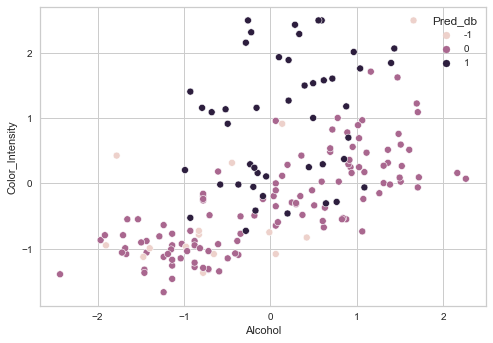

In [98]:
sns.scatterplot(x='Alcohol',y='Color_Intensity',data=df_s,hue=df['Pred_db'])

In [99]:
#pca, three types pc1,pc2,pc3 and pc1>pc2>pc3 (weightage)

from sklearn.decomposition import PCA


In [100]:
pca=PCA(n_components=13)
# 13 is maximum possible value for this data as this have 13columns only

In [101]:
df_s.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874


In [102]:
data_pca=pca.fit_transform(df_s)

In [103]:
data_pca=pd.DataFrame(data_pca,columns=range(1,14))

In [104]:
data_pca

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.358147,-1.520222,-0.126375,-0.224356,0.710891,-0.176645,0.701154,0.019187,0.689257,-1.031209,-0.359055,0.599343,-0.108299
1,2.229215,0.333261,-2.042838,-0.365783,-0.107448,-0.984902,0.048001,0.991649,-0.379664,-0.208787,-0.120602,0.372289,0.003640
2,2.540057,-1.036953,1.018845,0.766907,-0.363113,0.537666,0.412691,-0.464401,-1.164755,-0.136538,-0.289991,0.046713,0.042033
3,3.781124,-2.782566,-0.149224,0.593304,-0.273054,0.132210,-0.394978,0.694895,0.001904,-0.241293,0.688896,-0.318833,-0.380455
4,1.016872,-0.955225,2.113169,-0.431732,0.357108,-0.386733,0.487160,0.377559,0.283486,0.036566,-0.577236,-0.165368,-0.050547
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.311751,-2.173369,-0.383365,0.925038,-0.633273,-1.060998,0.685717,-0.130305,-0.027147,0.235376,0.111934,0.102554,-0.135217
174,-2.612425,-1.797712,0.210332,0.398412,0.192034,0.011534,0.136131,-0.565178,-0.063488,0.222939,0.236649,-0.309409,-0.181156
175,-2.671169,-2.865301,-0.975126,0.360633,1.185098,0.354148,0.853504,0.013484,0.020689,0.267263,0.595734,0.646957,-0.025525
176,-2.371603,-2.393808,-0.561485,-0.643948,0.658651,1.252325,0.813131,0.351025,0.086492,-0.495366,0.353956,0.346681,-0.083471


In [105]:
var=pca.explained_variance_ratio_

In [124]:
var

array([0.36475803, 0.19609775, 0.10911182, 0.07062378, 0.06296983,
       0.04815067, 0.04031504, 0.02744533, 0.02232516, 0.01931106,
       0.01755433, 0.01326634, 0.00807088])

In [109]:
#check where we will get 95 percent data
add=0
for i in range(13):
    add=add+var[i]
    print('Total Variance Upto PC%s is %.2f'%(i+1,add))

Total Variance Upto PC1 is 0.36
Total Variance Upto PC2 is 0.56
Total Variance Upto PC3 is 0.67
Total Variance Upto PC4 is 0.74
Total Variance Upto PC5 is 0.80
Total Variance Upto PC6 is 0.85
Total Variance Upto PC7 is 0.89
Total Variance Upto PC8 is 0.92
Total Variance Upto PC9 is 0.94
Total Variance Upto PC10 is 0.96
Total Variance Upto PC11 is 0.98
Total Variance Upto PC12 is 0.99
Total Variance Upto PC13 is 1.00


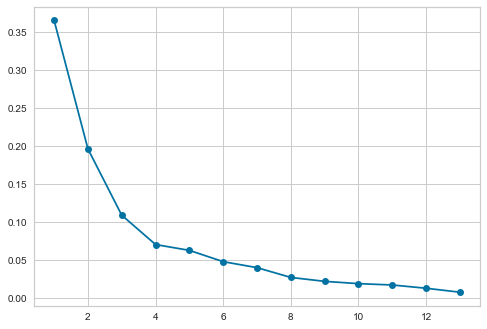

In [110]:
# ideally we should  take upto 9 or 10they have max data
#scree plot
plt.plot(np.arange(1,14),var,marker='o')


In [111]:
#LDA
# we need labelled data for lda
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Pred_KM,Pred_Agglo,Pred_db
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1,2,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1,2,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1,2,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1,2,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1,2,0


In [112]:
df_lda=df.drop(['Pred_Agglo','Pred_db'],axis=1)

In [114]:
df_lda.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Pred_KM
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


In [115]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [116]:
lda=LinearDiscriminantAnalysis()

In [117]:
df_lda=lda.fit_transform(df_lda.drop('Pred_KM',axis=1),df_lda['Pred_KM'])

In [118]:
df_lda

array([[ 5.43464643,  1.93572863],
       [ 4.19282163,  0.65956208],
       [ 3.98266162,  1.06908219],
       [ 4.87629429,  3.60805952],
       [ 2.03812243,  0.67304805],
       [ 4.90715478,  3.08798786],
       [ 4.64699671,  2.28580514],
       [ 4.87760111,  2.83267841],
       [ 3.58776616,  1.57486918],
       [ 3.56378936,  1.26588829],
       [ 5.49051158,  1.96896784],
       [ 3.52711826,  1.56552619],
       [ 3.72016983,  1.52048489],
       [ 5.17910347,  1.5882187 ],
       [ 5.74484195,  2.86926872],
       [ 3.75063361,  2.4863414 ],
       [ 3.97934603,  2.91132972],
       [ 3.51194095,  1.96700905],
       [ 5.85583228,  3.68957833],
       [ 3.46153105,  1.62078874],
       [ 4.1256731 ,  0.80217779],
       [ 2.04624774,  0.35087699],
       [ 5.20419191,  0.54619611],
       [ 3.43693426, -0.06184309],
       [ 3.69828129, -0.15194062],
       [ 3.12342283,  0.39817439],
       [ 4.06924048,  1.60534924],
       [ 2.77502417,  0.80943536],
       [ 4.00848274,

In [119]:
lda.explained_variance_ratio_

array([0.77480087, 0.22519913])

In [120]:
lda_df=pd.DataFrame({'Dis1':df_lda[:,0],'Dis2':df_lda[:,1],'Label':df['Pred_KM']})

In [121]:
lda_df

,Dis1,Dis2,Label
0,5.434646,1.935729,1
1,4.192822,0.659562,1
2,3.982662,1.069082,1
3,4.876294,3.608060,1
4,2.038122,0.673048,1
...,...,...,...
173,-4.824979,3.011965,2
174,-4.704232,1.985001,2
175,-5.101424,3.409723,2
176,-4.316430,2.723098,2


<AxesSubplot:xlabel='Dis1', ylabel='Dis2'>

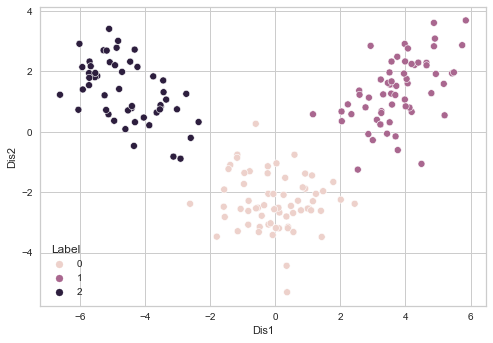

In [122]:
sns.scatterplot(x='Dis1',y='Dis2',hue='Label',data=lda_df)